In [29]:
import pandas as pd
lb = 'iwgsc_4_2_19'

In [30]:
srna_file = 'data/res/' + lb + '/ShortStack_D.gff3'
df = pd.read_csv(srna_file,sep="\t",header=None, comment='#')
df.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('sRNA len:',len(df.index))

('sRNA len:', 28725)


In [31]:
results_file = 'data/res/' + lb + '/Results.txt'
df_res = pd.read_csv(results_file,sep="\t")
#df_res = df_res[df_res.DicerCall.isin(['20','21','22','23'])]
print('Res len:',len(df_res.index))

('Res len:', 38496)


In [56]:
len(df_res[df_res.DicerCall == '24'].index)

27056

In [53]:
df_res[df_res.MIRNA == 'Y']

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
872,1A:309399489-309399664,Cluster_873,176,548,4.301,1,0.002,-,ACGGCAUAGAGGCACUGCAAA,327,...,21,Y,-1.0,5,1,32,440,61,5,4
1012,1A:419025472-419025570,Cluster_1013,99,388,3.045,20,1.000,+,CGAAUGUAUUUUUUAUGGCUUG,247,...,22,Y,-1.0,3,4,32,82,262,3,2
1204,1A:492271825-492271935,Cluster_1205,111,76,0.596,40,1.000,+,UGUGCCUGCUCUUCCUCGUCGC,18,...,21,Y,-1.0,13,0,15,28,20,0,0
2046,1B:348503065-348503303,Cluster_2047,239,112,0.879,109,0.982,+,UCGGUUGUCAAUUUAAUGAGC,86,...,21,Y,-1.0,3,0,0,103,1,0,5
2069,1B:357916189-357916332,Cluster_2070,144,47113,369.758,1,0.000,-,UCGGACCAGGCUUCAUUCCCC,46201,...,21,Y,-1.0,57,1,171,46459,414,8,3
2525,1B:565664575-565664794,Cluster_2526,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,21,Y,-1.0,5,2,27,182,7,0,0
2528,1B:566040574-566040690,Cluster_2529,117,312,2.449,304,0.006,-,UCCUCCGGCGAGCAUGGCUCC,152,...,21,Y,-1.0,15,33,7,249,3,1,4
3244,1D:51038087-51038213,Cluster_3245,127,112824,885.480,4,1.000,+,UGAGAAGGUAGAUCAUAAUAGC,111810,...,22,Y,-1.0,186,206,22,216,111918,272,4
4093,1D:352416921-352417003,Cluster_4094,83,437,3.430,63,0.000,-,ACCGGAUCUCCUGCUCGACGG,364,...,21,Y,-1.0,1,2,2,426,2,4,0
5492,2A:149238438-149238616,Cluster_5493,179,2508,19.684,42,0.001,-,AUCAGGAGAGAUGACACCGAC,1955,...,21,Y,-1.0,80,8,225,2045,8,12,130


In [32]:
counts_file = 'data/res/' + lb +  '/counts.named.csv'
df_counts = pd.read_csv(counts_file,sep="\t")
print('Counts len:',len(df_counts.index))

('Counts len:', 38496)


In [33]:
df_counts = df_counts[df_counts.Name.isin(df_res.Name.tolist())]
print('Counts filtered len:',len(df_counts.index))

('Counts filtered len:', 38496)


In [34]:
df_counts.head()

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,1A:209-460,Cluster_1,124,18,22,47,37
1,1A:688-753,Cluster_2,86,30,10,28,18
2,1A:5808-6115,Cluster_3,239,46,41,93,59
3,1A:7054-7211,Cluster_4,216,46,54,71,45
4,1A:7470-8084,Cluster_5,558,87,73,255,143


In [42]:
counts_file = 'data/res/' + lb +  '/counts.unnamed.fixed.csv'
df_counts_u = pd.read_csv(counts_file,sep="\t",index_col=False)
print('Counts len:',len(df_counts_u.index))

('Counts len:', 82444)


In [43]:
df_counts_u.head()

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,AAAAAGCUCGUAGUU,NaN,717,111,140,262,204
1,AAAAGAGAGUCAAAG,NaN,2291,777,267,771,476
2,AAAAGCUCGUAGUUG,NaN,386,100,77,105,104
3,AAAAGGACUUUGAAA,NaN,186,55,21,68,42
4,AAAAGGAUUGGCUCU,NaN,1867,455,141,871,400


In [44]:
df_counts_u['Locus'] = df_counts_u['Locus'].str.strip()
df_counts_u['Name'] = df_counts_u['Locus']
#df_counts_u = df_counts_u[(df_counts_u.Locus.str.len() >= 20) & (df_counts_u.Locus.str.len() <= 22)]
print('Counts len:',len(df_counts_u.index))

('Counts len:', 82444)


In [45]:
df_counts_u.head()

,Locus,Name,main,21dpiR1C.trimmed,21dpiR3C.trimmed,21dpiR1T.trimmed,21dpiR3T.trimmed
0,AAAAAGCUCGUAGUU,AAAAAGCUCGUAGUU,717,111,140,262,204
1,AAAAGAGAGUCAAAG,AAAAGAGAGUCAAAG,2291,777,267,771,476
2,AAAAGCUCGUAGUUG,AAAAGCUCGUAGUUG,386,100,77,105,104
3,AAAAGGACUUUGAAA,AAAAGGACUUUGAAA,186,55,21,68,42
4,AAAAGGAUUGGCUCU,AAAAGGAUUGGCUCU,1867,455,141,871,400


In [46]:
df_concat = pd.concat([df_counts,df_counts_u])

In [47]:
len(df_concat.index)

120940

In [48]:
df_concat.to_csv('data/res/' + lb + '/counts_filtered.csv', sep='\t', index=None)

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

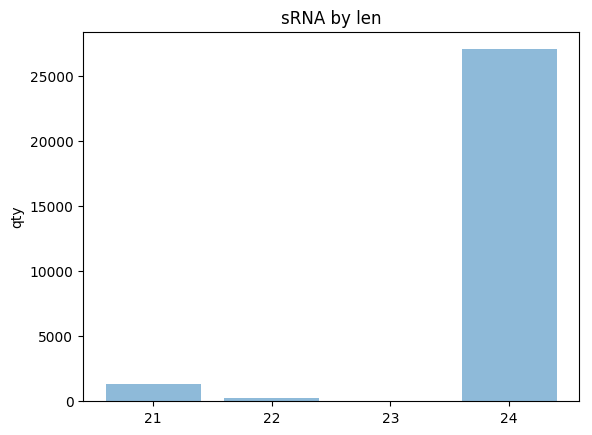

In [50]:
objects = ('21', '22','23', '24')
y_pos = np.arange(len(objects))
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y23 = len(df_res[df_res.DicerCall == '23'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
performance = [y21, y22,  y23, y24]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('qty')
plt.title('sRNA by len')
plt.show()

In [51]:
y21 = len(df_res[df_res.DicerCall == '21'].index)
y22 = len(df_res[df_res.DicerCall == '22'].index)
y23 = len(df_res[df_res.DicerCall == '23'].index)
y24 = len(df_res[df_res.DicerCall == '24'].index)
y21, y22, y23, y24

(1358, 215, 46, 27056)